In [314]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [21]:
### DEFAULT PARAMETERS
d_n=1000000;
d_k=20000;
d_m=100;

d_skew=1.0;
d_ratio=2.0;

d_cores=3;
d_inner=10000;
d_outer=10000;

### READ ALL RESULTS

experiments=read.csv("results/experiments.csv", sep = "\t");
small_experiments=enrich_s_exp(read.csv("results/small_experiments.csv", sep = "\t"));
all_experiments=bind_rows(experiments,small_experiments);

#k = k_factor * ratio * m^2
experiments$k_factor=experiments$k/(experiments$max_weight_ratio*experiments$m*experiments$m);
experiments$n_ratio=experiments$n/experiments$k;

write.table(experiments,"all_experiments.csv");

In [2]:
enrich_s_exp = function(s_exp) {
    epsilons = s_exp[,c(9:length(s_exp[1,]))];
    #s_exp = s_exp[,-c(9:length(s_exp[1,]))];
    avg_var_eps = as.data.frame(t(as.data.frame(lapply(as.data.frame(t(epsilons)),
           FUN=function(epss) c(mean(epss),var(epss),min(epss),max(epss))))));
    colnames(avg_var_eps)=c("epsilon_mean","epsilon_var","epsilon_min","epsilon_max");
    rownames(avg_var_eps)=c(1:length(s_exp[,1]));

    s_exp$epsilon_mean = avg_var_eps$epsilon_mean;
    s_exp$epsilon_var  = avg_var_eps$epsilon_var;
    s_exp$epsilon_min  = avg_var_eps$epsilon_min;
    s_exp$epsilon_max  = avg_var_eps$epsilon_max;

    s_exp$k_factor=s_exp$k/(s_exp$max_weight_ratio*s_exp$m*s_exp$m);
    s_exp$n_ratio =s_exp$n/s_exp$k;   
    return(s_exp);
}

In [28]:
small_n=small_experiments[small_experiments$n_ratio==1,][-c(1,length(small_experiments[1,]))];
big_n=small_experiments[small_experiments$n_ratio==2,][-c(1,length(small_experiments[1,]))];

small_n=small_n[order(small_n$k,small_n$skew,small_n$max_weight_ratio),];
big_n=big_n[order(big_n$k,big_n$skew,big_n$max_weight_ratio),];

tmp_df = data.frame((small_n$epsilon_mean-big_n$epsilon_mean))
colnames(tmp_df)=c("rel_diff")
tmp_df$epsilon_sq_var_small_n = sqrt(small_n$epsilon_var)
tmp_df$epsilon_sq_var_big_n   = sqrt(  big_n$epsilon_var)

tmp_df

Warning message:
In small_n$epsilon_mean - big_n$epsilon_mean: longer object length is not a multiple of shorter object length

ERROR: Error in `$<-.data.frame`(`*tmp*`, "epsilon_sq_var_big_n", value = c(0.00078955894330738, : replacement has 63 rows, data has 168


,rel_diff,epsilon_sq_var_small_n
1,0.000435527,0.0007837276
2,-5.9517e-05,0.0008215743
3,-8.7036e-05,0.0005658365
4,-1.3872e-05,0.0003920585
5,5.4938e-05,0.0002904446
6,0.000155903,0.0003442497
7,3.15789e-05,0.0002277456
8,6.87666e-05,0.0001437744
9,0.00017603,0.0002199071
10,0.001296144,0.0002667974


In [29]:
k_vs_epsilon_plot = function(
        d_n=1000000,d_k=20000,d_m=100,d_skew=1.0,d_ratio=2.0,d_cores=3,d_inner=10000,d_outer=10000
    ) {
    #different k with same n, skew, ratio
    vary_k = experiments[
            experiments$n == d_n & experiments$skew == d_skew & experiments$max_weight_ratio == d_ratio,
            c("k","epsilon0.9","epsilon0.95","epsilon0.99")
        ];

    heuristic_k = d_m*d_m*d_ratio;

    cols = c("blue","purple","red");
    pchs = c(1,3,5);

    plot(vary_k[,"k"]/heuristic_k,vary_k$epsilon0.9,log="xy",xlab=expression("k/k_estimate"),ylab="epsilon",col=cols[1],pch=pchs[1],
        main="AWS: size of U vs relative error",sub=paste("n =",d_n,", m =",d_m,", skew =",d_skew,", w_ratio =",d_ratio,", k_estimate =",heuristic_k));
    abline(v=1,lty=3)
    abline(h=0.01,lty=3)
    points(vary_k[,"k"]/heuristic_k,vary_k$epsilon0.95,col=cols[2],pch=pchs[2])
    points(vary_k[,"k"]/heuristic_k,vary_k$epsilon0.99,col=cols[3],pch=pchs[3])

    legend(0.01,0.05,c("sigma = 0.9","sigma = 0.95","sigma = 0.99"),col=cols,pch=pchs)

}

k_factor_given_ratio_vs_epsilon_plot = function(
        d_n=1000000,d_k=20000,d_m=100,d_skew=1.0,d_ratio=2.0,d_cores=3,d_inner=10000,d_outer=10000
    ) {
    #different k with same n, skew, ratio
    vary_k = experiments[
            experiments$n == d_n & experiments$skew == d_skew & experiments$max_weight_ratio == d_ratio,
            c("k_factor","epsilon0.9","epsilon0.95","epsilon0.99")
        ];

    heuristic_k = d_m*d_m*d_ratio;

    cols = c("blue","purple","red");
    pchs = c(1,3,5);

    plot(vary_k[,"k_factor"],vary_k$epsilon0.9,log="xy",xlab=expression("k_factor"),ylab="epsilon",col=cols[1],pch=pchs[1],
        main="AWS: size of U vs relative error",sub=paste("n =",d_n,", m =",d_m,", skew =",d_skew,", w_ratio =",d_ratio));
    abline(v=1,lty=3)
    abline(h=0.01,lty=3)
    points(vary_k[,"k_factor"],vary_k$epsilon0.95,col=cols[2],pch=pchs[2])
    points(vary_k[,"k_factor"],vary_k$epsilon0.99,col=cols[3],pch=pchs[3])

    legend(0.01,0.05,c("sigma = 0.9","sigma = 0.95","sigma = 0.99"),col=cols,pch=pchs)
}

k_factor_given_k_vs_epsilon_plot = function(
        d_n=1000000,d_k=20000,d_m=100,d_skew=1.0,d_ratio=2.0,d_cores=3,d_inner=10000,d_outer=10000
    ) {
    #different k with same n, skew, ratio
    vary_k = experiments[
            experiments$n == d_n & experiments$skew == d_skew & experiments$k == d_k,
            c("k_factor","epsilon0.9","epsilon0.95","epsilon0.99")
        ];

    heuristic_k = d_m*d_m*d_ratio;

    cols = c("blue","purple","red");
    pchs = c(1,3,5);

    plot(vary_k[,"k_factor"],vary_k$epsilon0.9,log="xy",xlab=expression("k_factor"),ylab="epsilon",col=cols[1],pch=pchs[1],
        main="AWS: size of U vs relative error",sub=paste("n =",d_n,", k =",d_k,", m =",d_m,", skew =",d_skew));
    abline(v=1,lty=3)
    abline(h=0.01,lty=3)
    points(vary_k[,"k_factor"],vary_k$epsilon0.95,col=cols[2],pch=pchs[2])
    points(vary_k[,"k_factor"],vary_k$epsilon0.99,col=cols[3],pch=pchs[3])

    legend(0.01,0.05,c("sigma = 0.9","sigma = 0.95","sigma = 0.99"),col=cols,pch=pchs)
}

n_vs_epsilon_plot = function(
        d_n=1000000,d_k=20000,d_m=100,d_skew=1.0,d_ratio=2.0,d_cores=3,d_inner=10000,d_outer=10000
    ) {
    #different n with same k, skew, ratio
    vary_n = experiments[
            experiments$k == d_k & experiments$skew == d_skew & experiments$max_weight_ratio == d_ratio,
            c("n","epsilon0.9","epsilon0.95","epsilon0.99")
        ];

    heuristic_k = d_m*d_m*d_ratio;

    cols = c("blue","purple","red");
    pchs = c(1,3,5);

    max_y = max(vary_n$epsilon0.9,vary_n$epsilon0.95,vary_n$epsilon0.99);
    
    plot(vary_n[,"n"]/d_k,vary_n$epsilon0.9,log="x",xlab=expression("n/k"),ylab="epsilon",ylim=c(0,max_y),col=cols[1],pch=pchs[1],
        main="AWS: size of R vs relative error",sub=paste("k =",d_k,", m =",d_m,", skew =",d_skew,", w_ratio =",d_ratio));
    abline(v=1,lty=3)
    abline(h=0.01,lty=3)
    points(vary_n[,"n"]/d_k,vary_n$epsilon0.95,col=cols[2],pch=pchs[2])
    points(vary_n[,"n"]/d_k,vary_n$epsilon0.99,col=cols[3],pch=pchs[3])

    legend(20.0,0.05,c("sigma = 0.9","sigma = 0.95","sigma = 0.99"),col=cols,pch=pchs)
}


ratio_vs_epsilon_plot = function(
        d_n=1000000,d_k=20000,d_m=100,d_skew=1.0,d_ratio=2.0,d_cores=3,d_inner=10000,d_outer=10000
    ) {
    #different ratio with same n, k, skew
    vary_ratio = experiments[
            experiments$n == d_n & experiments$k == d_k & experiments$skew == d_skew,
            c("max_weight_ratio","epsilon0.9","epsilon0.95","epsilon0.99")
        ];

    heuristic_k = d_m*d_m*d_ratio;

    cols = c("blue","purple","red");
    pchs = c(1,3,5);

    plot(vary_ratio[,"max_weight_ratio"],vary_ratio$epsilon0.9,log="x",ylim=c(0.001,0.04),xlab=expression("Maximum weight ratio"),ylab="epsilon",col=cols[1],pch=pchs[1],
        main="AWS: Maximum weight ratio vs relative error",sub=paste("n =",d_n,", k =",d_k,", m =",d_m,", w_skew =",d_skew));
    abline(v=1,lty=3)
    abline(h=0.01,lty=3)
    points(vary_ratio[,"max_weight_ratio"],vary_ratio$epsilon0.95,col=cols[2],pch=pchs[2])
    points(vary_ratio[,"max_weight_ratio"],vary_ratio$epsilon0.99,col=cols[3],pch=pchs[3])

    legend(20.0,0.05,c("sigma = 0.9","sigma = 0.95","sigma = 0.99"),col=cols,pch=pchs)
    #NOTE: graph would be better if k is adjusted according to skew (to k_heuristic)
}




skew_vs_epsilon_plot = function(
        d_n=1000000,d_k=20000,d_m=100,d_skew=1.0,d_ratio=2.0,d_cores=3,d_inner=10000,d_outer=10000
    ) {
    #different skew with same n, k, ratio (DATA MISSING FOR NOW)
    vary_skew = experiments[
            experiments$n == d_n & experiments$k == d_k & experiments$max_weight_ratio == d_ratio,
            c("skew","epsilon0.9","epsilon0.95","epsilon0.99")
        ];

    heuristic_k = d_m*d_m*d_ratio;

    cols = c("blue","purple","red");
    pchs = c(1,3,5);

    plot(vary_skew[,"skew"],vary_skew$epsilon0.9,log="xy",xlab=expression("skew"),ylab="epsilon",col=cols[1],pch=pchs[1],
        main="AWS: skew vs relative error",sub=paste("n =",d_n,", k =",d_k,", m =",d_m,", w_ratio =",d_ratio));
    abline(v=1,lty=3)
    abline(h=0.01,lty=3)
    points(vary_skew[,"skew"],vary_skew$epsilon0.95,col=cols[2],pch=pchs[2])
    points(vary_skew[,"skew"],vary_skew$epsilon0.99,col=cols[3],pch=pchs[3])

    legend(20.0,0.05,c("sigma = 0.9","sigma = 0.95","sigma = 0.99"),col=cols,pch=pchs)
}




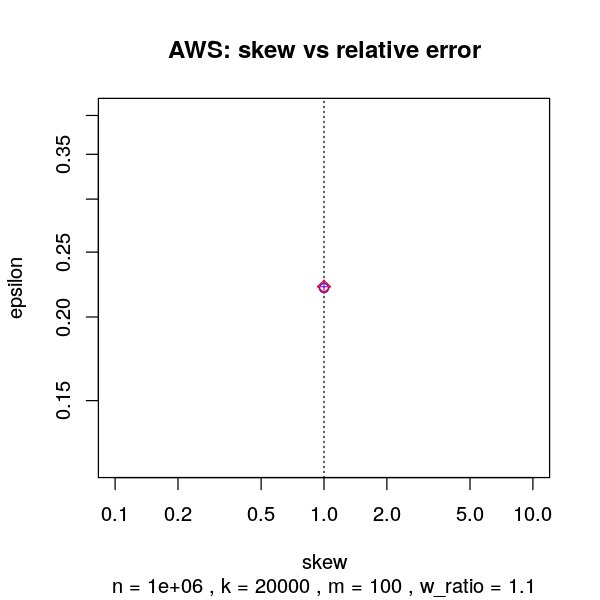

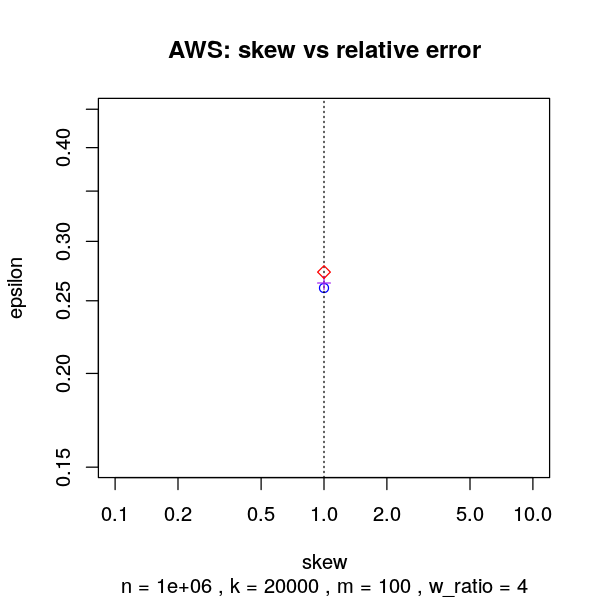

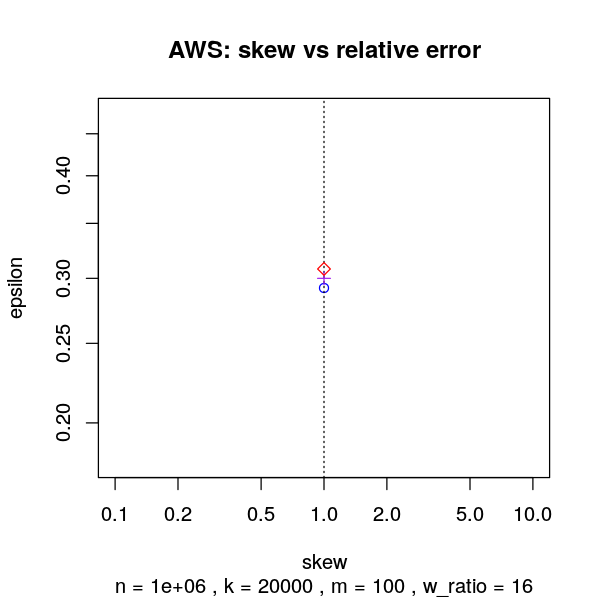

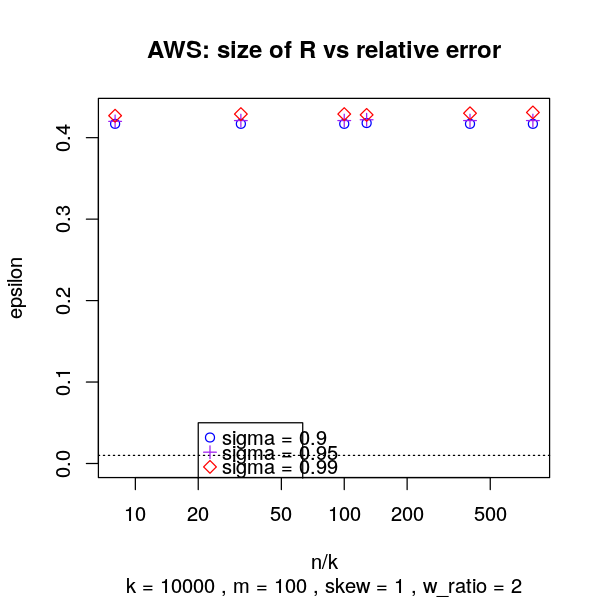

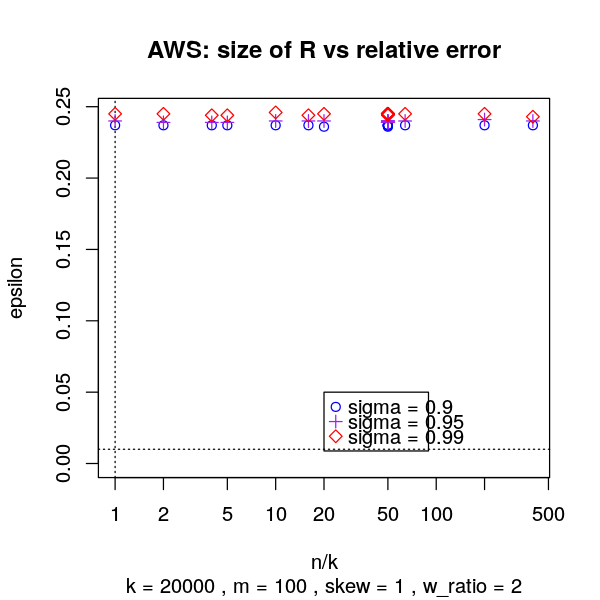

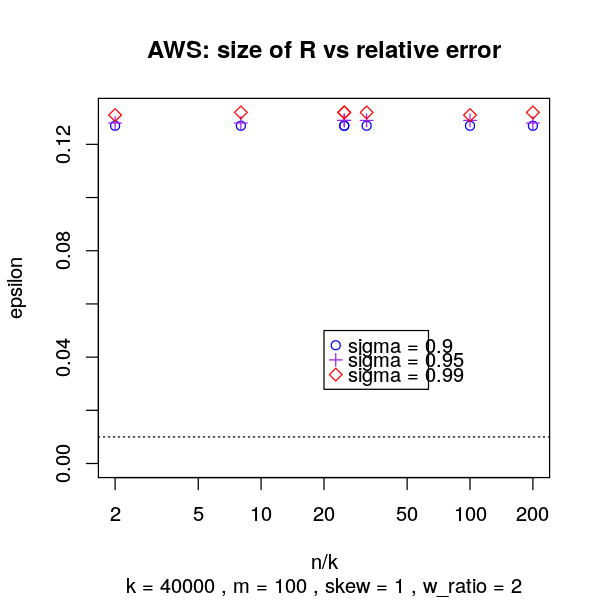

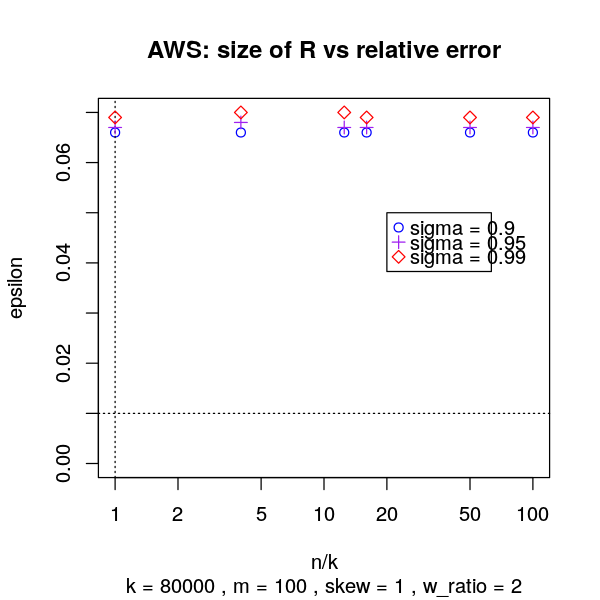

Warning message:
In min(x): no non-missing arguments to min; returning InfWarning message:
In max(x): no non-missing arguments to max; returning -InfWarning message:
In min(x): no non-missing arguments to min; returning InfWarning message:
In max(x): no non-missing arguments to max; returning -Inf

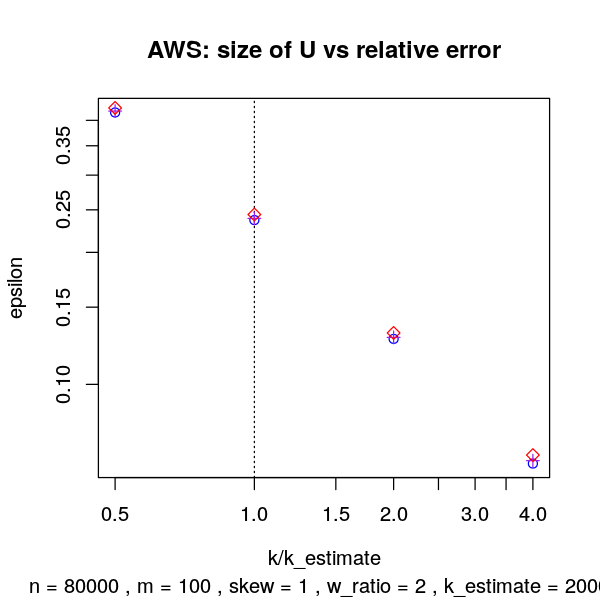

ERROR: Error in plot.window(...): need finite 'xlim' values


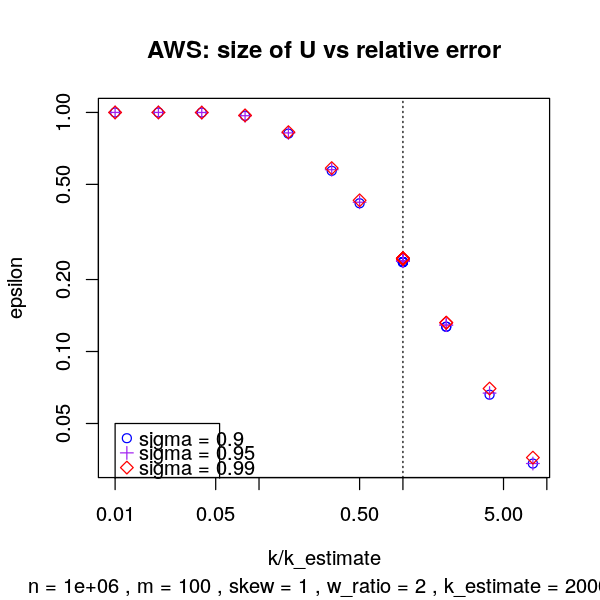

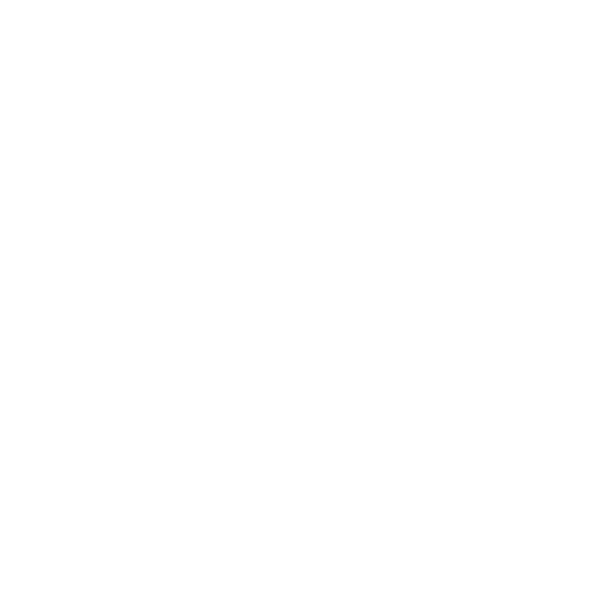

In [30]:

###Identify common values of k
##table(sort(experiments$k))
##
##for(k in c(400,1600,5000,10000,20000,40000)) {
##    k_factor_given_k_vs_epsilon_plot(d_n = 1e6, d_k=k);
##}

skew_vs_epsilon_plot(d_ratio=1.1);
skew_vs_epsilon_plot(d_ratio=4.0);
skew_vs_epsilon_plot(d_ratio=16.0);

for(k in c(10000,20000,40000,80000)) {#did not plot k=400,1600,5000, for these are quite unrealistic k values
    n_vs_epsilon_plot(d_k=k);
}

for(n in c(80000,1e6,1600000,2400000,4800000)) {
    k_vs_epsilon_plot(d_n = n);#equiv to k_factor_given_ratio_vs_epsilon_plot(d_n = 1e6, d_ratio=ratio);
}

#Notice that both small and big ratio are good.
##Explanation: - for small ratio we have near uniform data
##             - for big ratio k_estimate gets near n, improving the result

for(ratio in c(1.1,2,4,8,16,32)) {
    k_vs_epsilon_plot(d_ratio=ratio);#equiv to k_factor_given_ratio_vs_epsilon_plot(d_n = 1e6, d_ratio=ratio);
}
###dev.print(pdf, 'exp2_3_vary_k.pdf')



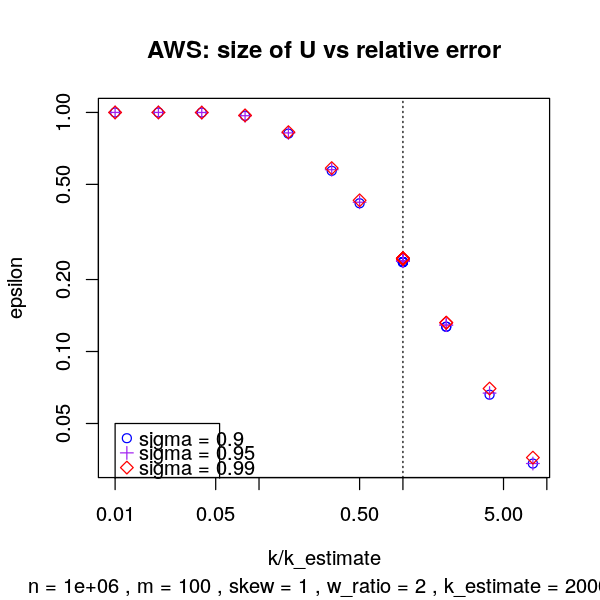

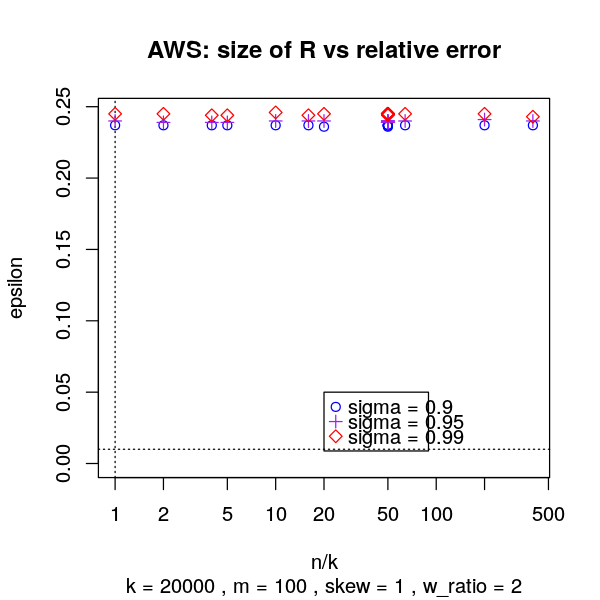

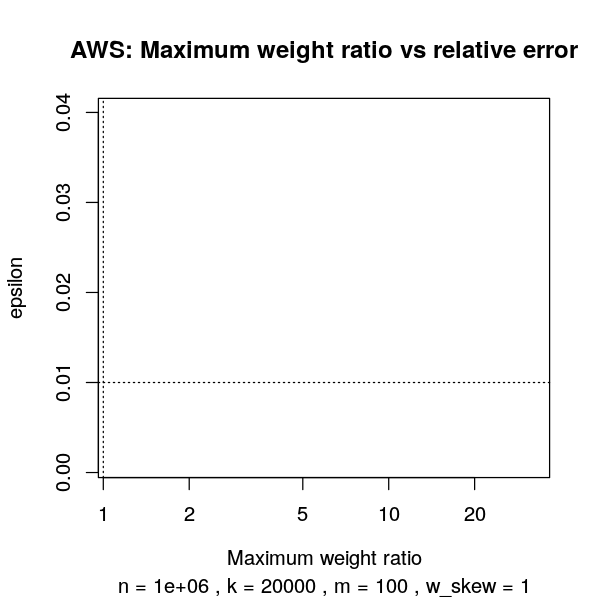

In [31]:
#My first plots

k_vs_epsilon_plot();

###dev.print(pdf, 'exp2_3_vary_k.pdf')

n_vs_epsilon_plot();
###dev.print(pdf, 'exp2_3_vary_n.pdf')

ratio_vs_epsilon_plot();
###dev.print(pdf, 'exp2_3_vary_ratio.pdf')

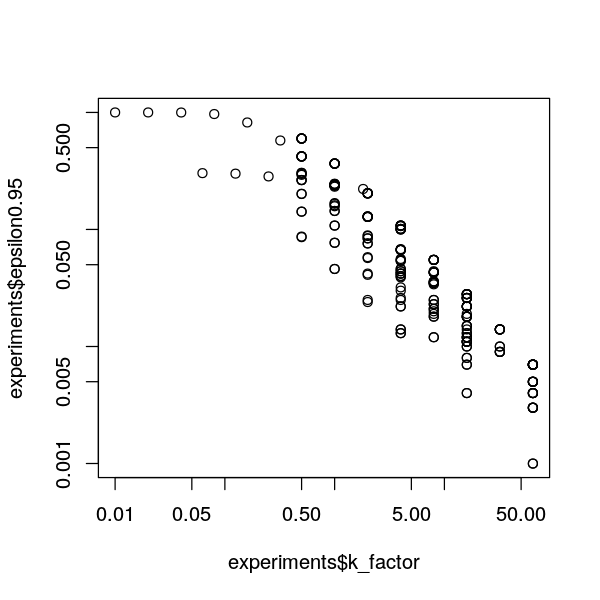

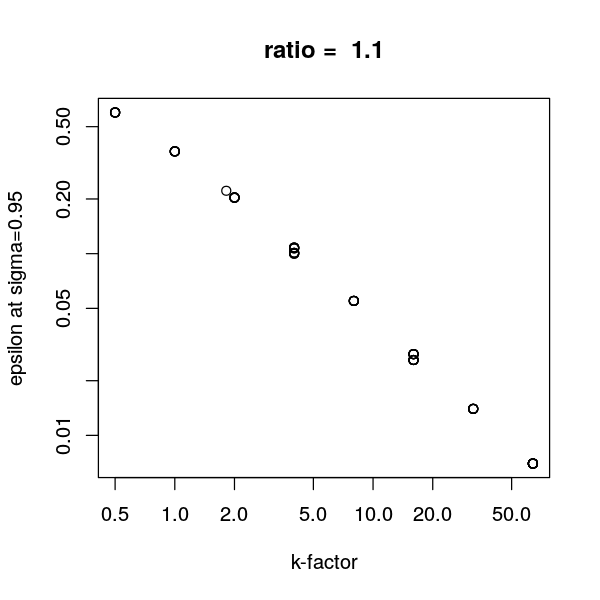

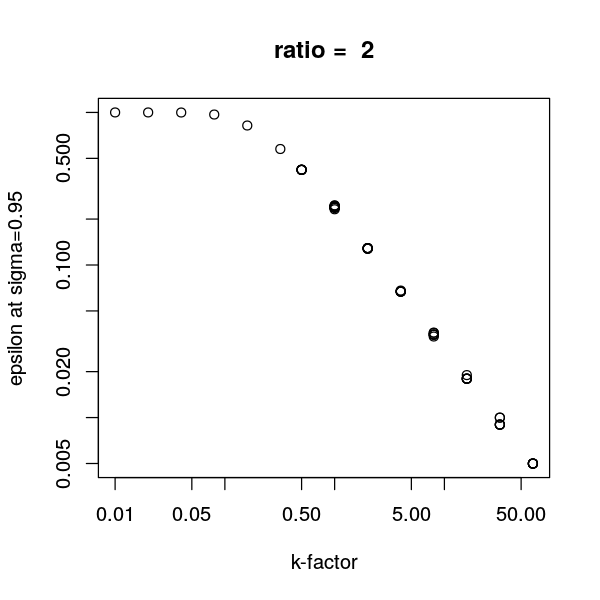

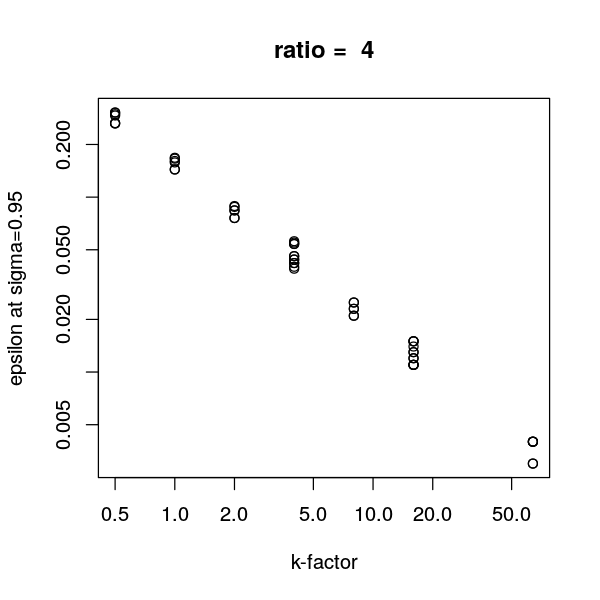

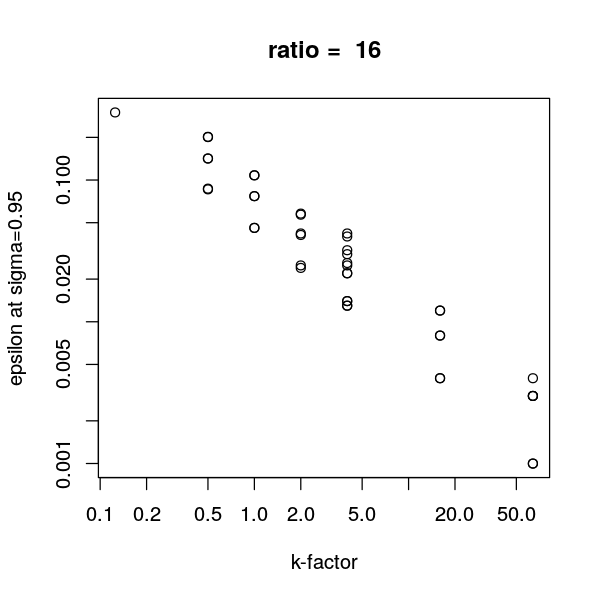

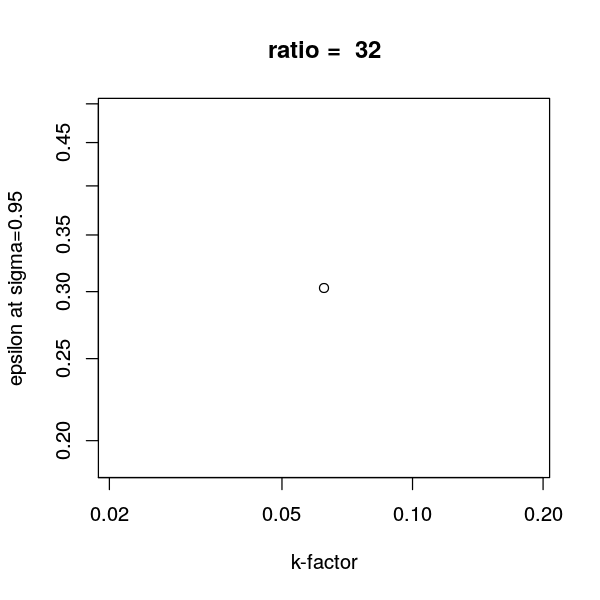

In [32]:
##plot(apply(experiments,1, FUN=function(r) r['m']^2*r['max_weight_ratio']/r['k']),experiments$epsilon0.95)

#ALL points
plot(experiments$k_factor,experiments$epsilon0.95,log="xy",col=1);

#Slices (for different weight ratio)
for(ratio in c(1.1, 2.0, 4.0, 16.0, 32.0)) {
    selected_experiments=experiments[experiments$max_weight_ratio == ratio,]
    plot(selected_experiments$k_factor,selected_experiments$epsilon0.95,log="xy",col=1,xlab="k-factor",ylab="epsilon at sigma=0.95",main=paste("ratio = ",ratio));
}
#points(selected_experiments$k_factor,selected_experiments$epsilon0.95,log="xy",col=2);
abline(v=1,lty=3);
abline(h=0.01,lty=3);
#[experiments$epsilon0.95 < 0.01,]
#experiments[experiments$epsilon0.95 >= 0.01,]

#scatterplot3d(log(experiments$k_factor),log(experiments$epsilon0.95), experiments$max_weight_ratio,log="xy");


Warning message:
In min(x): no non-missing arguments to min; returning InfWarning message:
In max(x): no non-missing arguments to max; returning -InfWarning message:
In max(high_ratio_low_kfactor$epsilon0.99): no non-missing arguments to max; returning -Inf

ERROR: Error in plot.window(...): need finite 'xlim' values


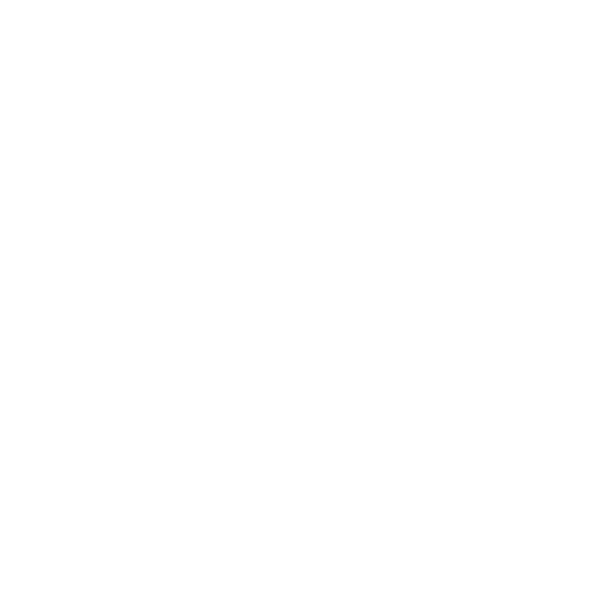

In [33]:
high_ratio_low_kfactor=experiments[experiments$max_weight_ratio==32&experiments$k_factor==0.5,c("skew","epsilon0.9","epsilon0.95","epsilon0.99")]
plot(high_ratio_low_kfactor$skew,high_ratio_low_kfactor$epsilon0.9,pch=1,col="blue",ylim=c(0,max(high_ratio_low_kfactor$epsilon0.99)))
points(high_ratio_low_kfactor$skew,high_ratio_low_kfactor$epsilon0.95,pch=3,col="purple")
points(high_ratio_low_kfactor$skew,high_ratio_low_kfactor$epsilon0.99,pch=5,col="red")

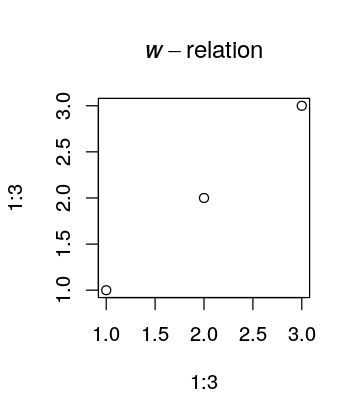

In [121]:
plot(1:3,1:3,main=expression(italic(w)-relation))

In [372]:
df[1,]


,skew,k_factor,max_weight_ratio
1,1,0.5,2


,skew,n_ratio,k_factor,max_weight_ratio,m
1,1,128,0.5,2,100


[1] "AWS_plot_m_rank_1.pdf"
[1] "AWS_plot_m_rank_2.pdf"


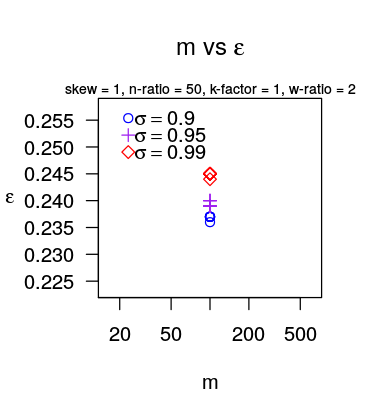

[1] "AWS_plot_m_rank_3.pdf"


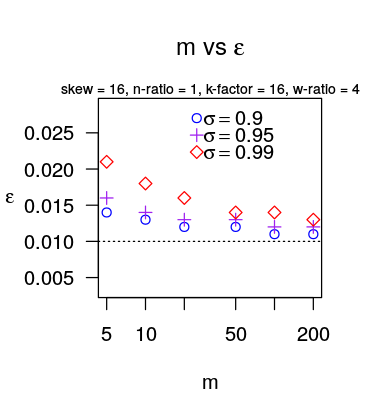

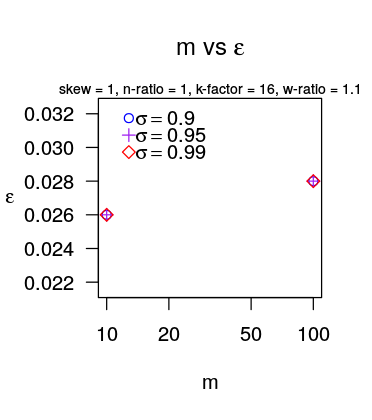

In [22]:
make_plot = function(plot_var_id, value_rank) {
    #Note that the relevant quantities are: n,k,skew,ratio. Select 3 out of 4, use final one as axis vs epsilon
    plot_vars = c("skew","n_ratio","k_factor","max_weight_ratio","m");
    nice_plot_vars = c("skew","n-ratio","k-factor","w-ratio","m");
    plot_var = plot_vars[plot_var_id];

    const_vars = setdiff(plot_vars,plot_var);
    nice_const_vars = nice_plot_vars[-plot_var_id];
    nice_plot_var = nice_plot_vars[plot_var_id];
    
    df=experiments[,const_vars];
    #identify common combination of values
    common_value_sets=sort(table(unlist(lapply(as.list(as.data.frame(t(df))),toString))),decreasing=TRUE);
    common_value_set = as.numeric(strsplit(names(common_value_sets)[value_rank],",")[[1]])
    
    #select data based on this common combination
    plot_data=experiments[abs(experiments[,const_vars[1]]-common_value_set[1])<1e-6 & 
                          abs(experiments[,const_vars[2]]-common_value_set[2])<1e-6 & 
                          abs(experiments[,const_vars[3]]-common_value_set[3])<1e-6 & 
                          abs(experiments[,const_vars[4]]-common_value_set[4])<1e-6,]

    var_x =plot_data[,plot_var]
    var_y1=plot_data$epsilon0.9
    var_y2=plot_data$epsilon0.95
    var_y3=plot_data$epsilon0.99
    all_ys=c(var_y1,var_y2,var_y3);
    
    
    typical_size = 10*sqrt(var(all_ys));
    
    y_min = min(all_ys);
    y_max = max(all_ys);
    used_size = y_max-y_min;
    if(used_size < typical_size && y_min - (typical_size - used_size)*0.5 > 0) {
        y_min = y_min - (typical_size - used_size)*0.5;
        y_max = y_max + (typical_size - used_size)*0.5;
    }
    y_min = y_min# - 0.002;
    y_max = y_max# - 0.002; 
    
    plot_width = 3.1;
    plot_height = 3.5;
    options(repr.plot.las=1,repr.plot.width=plot_width, repr.plot.height=plot_height);
    par(las=1);
    plot(  var_x,var_y1, pch=1, col="blue", log="x",
         ylim=c(y_min,y_max),
         ylab="",xlab=nice_plot_var,
         main=bquote(paste(.(nice_plot_var)," vs ", epsilon)),
         #xaxt='n',##Remove for n_ratio
         yaxt='n',
            )
    
    
    points(var_x,var_y2,pch=3,col="purple")
    points(var_x,var_y3,pch=5,col="red")
    #points(1:64,0.04*8/(1:64),pch=5,col="black",type="l")
    

    mtext(paste(paste(sapply(1:4,function(i) paste(nice_const_vars[i],"=",common_value_set[i])),collapse=", ")),cex=0.7)
    mtext(expression(epsilon), side=2, line=3.5)
    #axis(side = 1, at=var_x)##Remove for n_ratio
    axis(side = 2,las=1)
        
    abline(v=1,lty=3)
    abline(h=0.01,lty=3)
    #legend(0.01,0.05,c("sigma = 0.9","sigma = 0.95","sigma = 0.99"),col=c("blue","purple","red"),pch=c(1,3,5))
    legend_x = min(var_x)*0.1+max(var_x)*0.11;
    y_height_ratio = 1.0;
    legend_y = (1-y_height_ratio)*y_min+y_height_ratio*y_max;
    #legend(legend_x,legend_y,c(expression(sigma == 0.9),expression(sigma == 0.95),expression(sigma == 0.99)),col=c("blue","purple","red"),pch=c(1,3,5))
    #legend("topright",bty = "n",y.intersp=1.5,c(expression(sigma == 0.9),expression(sigma == 0.95),expression(sigma == 0.99)),col=c("blue","purple","red"),pch=c(1,3,5))
    legend(legend_x,legend_y,bty = "n",y.intersp=2.2,c(expression(sigma == 0.9),expression(sigma == 0.95),expression(sigma == 0.99)),col=c("blue","purple","red"),pch=c(1,3,5))
    dev.print(pdf, paste("AWS_plot_",plot_var,"_rank_",value_rank,".pdf",sep=""),width=plot_width,height=plot_height);
}
                         

                             
for(plot_var_id in c(5)) {
    for(value_rank in c(1,2,3)) {
        plot_vars = c("skew","n_ratio","k_factor","max_weight_ratio","m");
        plot_var = plot_vars[plot_var_id];
        print(paste("AWS_plot_",plot_var,"_rank_",value_rank,".pdf",sep=""));
        make_plot(plot_var_id,value_rank);
    }
}

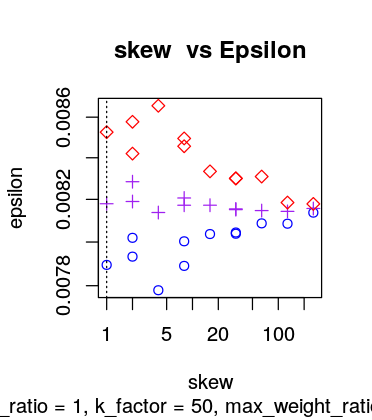

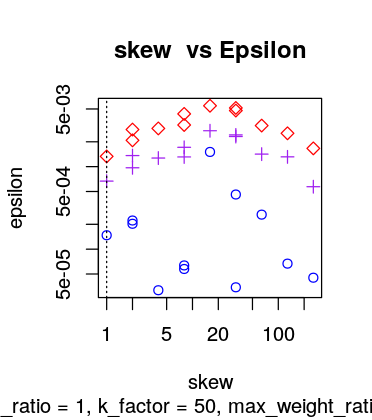

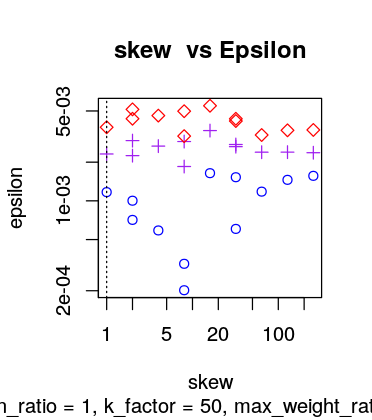

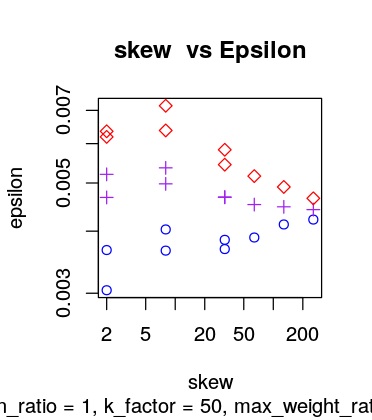

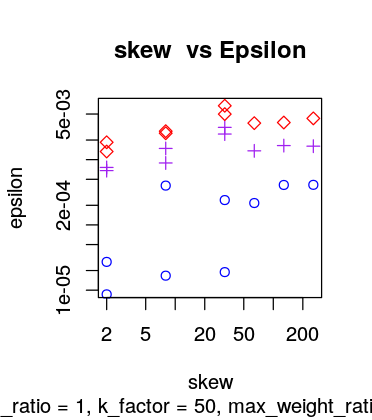

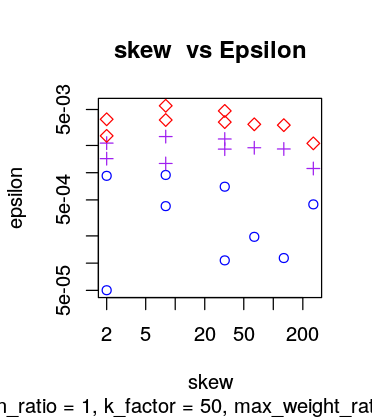

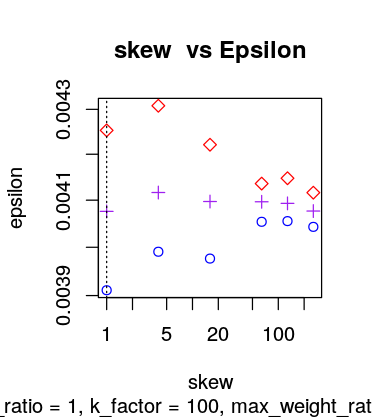

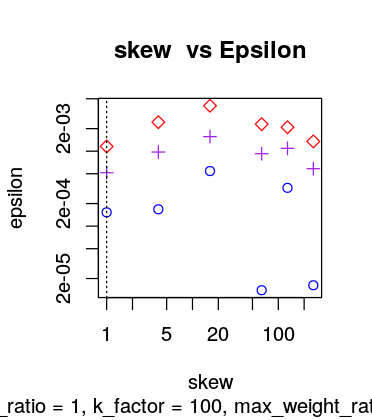

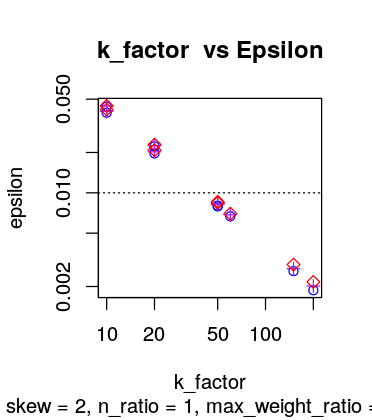

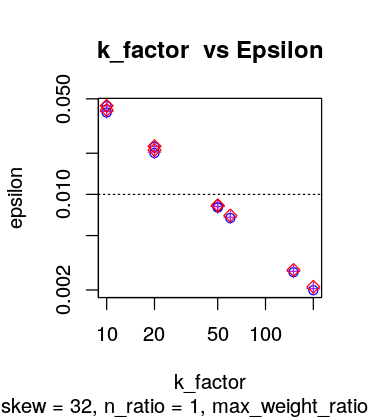

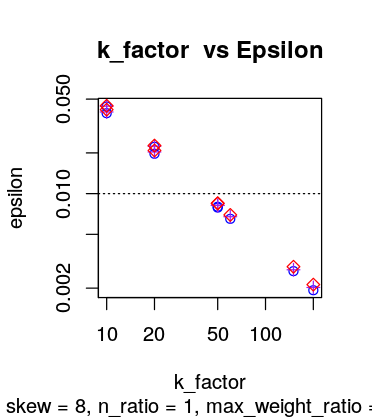

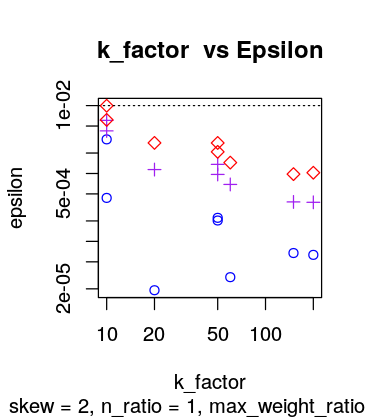

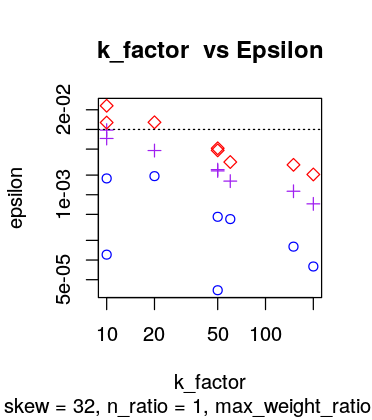

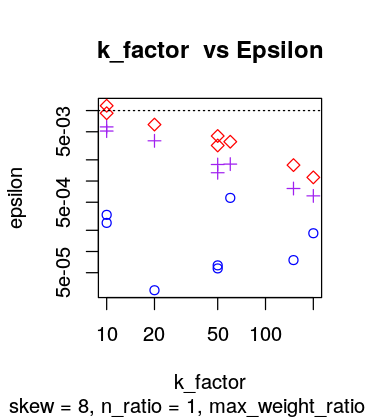

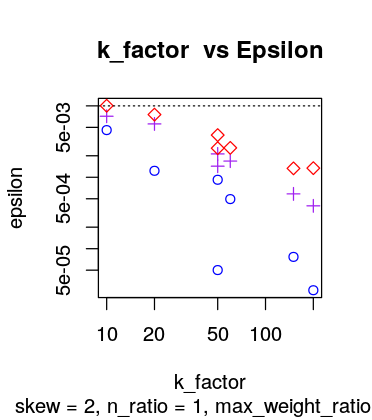

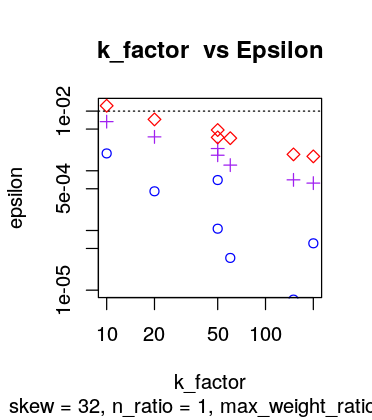

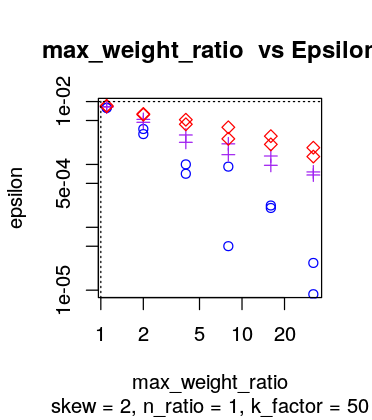

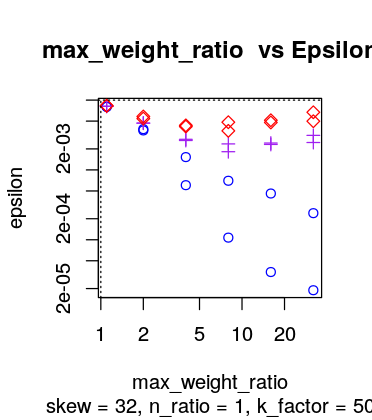

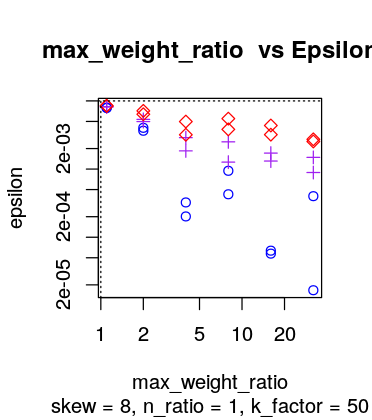

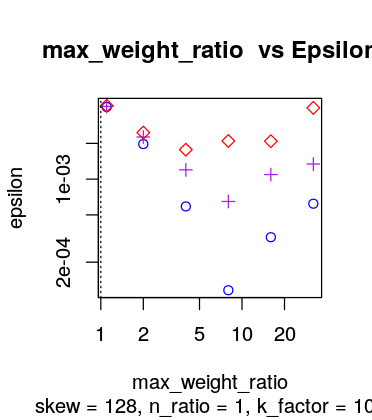

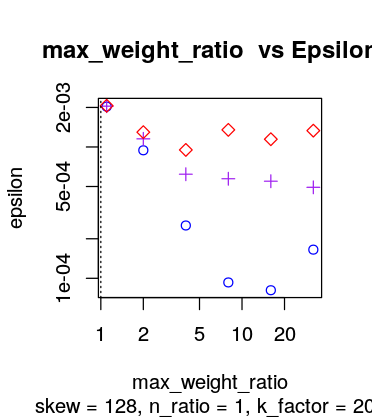

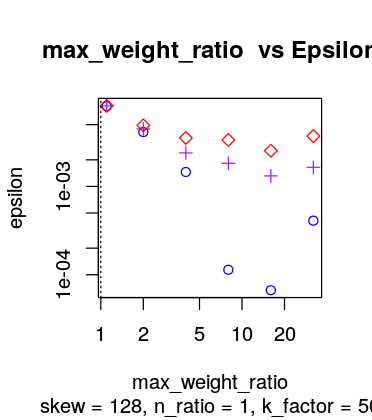

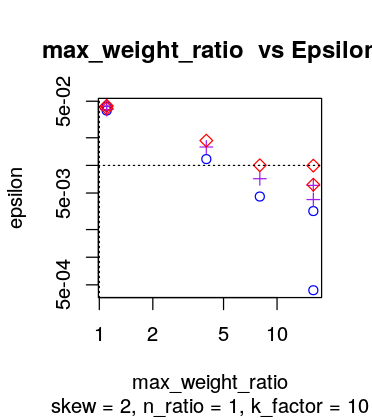

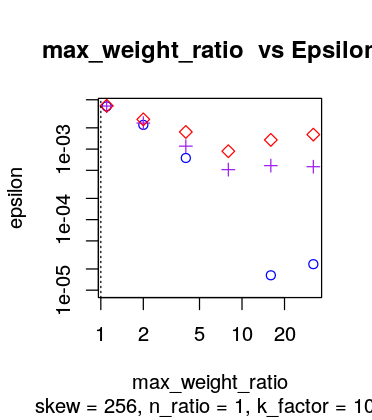

In [291]:
s_make_plot = function(plot_var_id, value_rank) {
    #Note that the relevant quantities are: n,k,skew,ratio. Select 3 out of 4, use final one as axis vs epsilon
    plot_vars = c("skew","n_ratio","k_factor","max_weight_ratio");
    plot_var = plot_vars[plot_var_id];

    const_vars = setdiff(plot_vars,plot_var);

    df = small_experiments[const_vars];

    #identify common combination of values
    common_value_sets=sort(table(unlist(lapply(as.list(as.data.frame(t(df))),toString))),decreasing=TRUE);
    common_value_set = as.numeric(strsplit(names(common_value_sets)[value_rank],",")[[1]])
    
    #select data based on this common combination
    plot_data=small_experiments[abs(small_experiments[,const_vars[1]]-common_value_set[1])<1e-6 & 
                          abs(small_experiments[,const_vars[2]]-common_value_set[2])<1e-6 & 
                          abs(small_experiments[,const_vars[3]]-common_value_set[3])<1e-6,]

    var_x =plot_data[,plot_var]
    var_y1=plot_data$epsilon_min;#plot_data$epsilon_mean-sqrt(plot_data$epsilon_var)
    var_y2=plot_data$epsilon_mean;
    var_y3=plot_data$epsilon_max;
    all_ys=c(var_y1,var_y2,var_y3);
    plot(  var_x,var_y1, pch=1, col="blue", log="xy",
         ylim=c(max(min(all_ys),1e-5),max(all_ys)),
         ylab="epsilon",xlab=plot_var,
         main=paste(plot_var," vs Epsilon"), 
         sub=paste(sapply(1:3,function(i) paste(const_vars[i],"=",common_value_set[i])),collapse=", ")
            )
    points(var_x,var_y2,pch=3,col="purple")
    points(var_x,var_y3,pch=5,col="red")

    abline(v=1,lty=3)
    abline(h=0.01,lty=3)
    legend(0.01,0.05,c("sigma = 0.9","sigma = 0.95","sigma = 0.99"),col=c("blue","purple","red"),pch=c(1,3,5))
}
                         
for(plot_var_id in c(1,3,4)) {
    for(value_rank in 1:8) {
        s_make_plot(plot_var_id,value_rank);
    }
}

In [37]:
ordered_small_experiments=small_experiments[order(small_experiments$k,small_experiments$skew,small_experiments$max_weight_ratio,small_experiments$n),];

In [38]:
small_experiments[37,]$epsilon_mean
sqrt(small_experiments[37,]$epsilon_var)

[1] 0.00520496

[1] 0.0008848219

In [39]:
small_experiments[55,]$epsilon_mean
sqrt(small_experiments[55,]$epsilon_var)

[1] 0.004676846

[1] 0.001047045

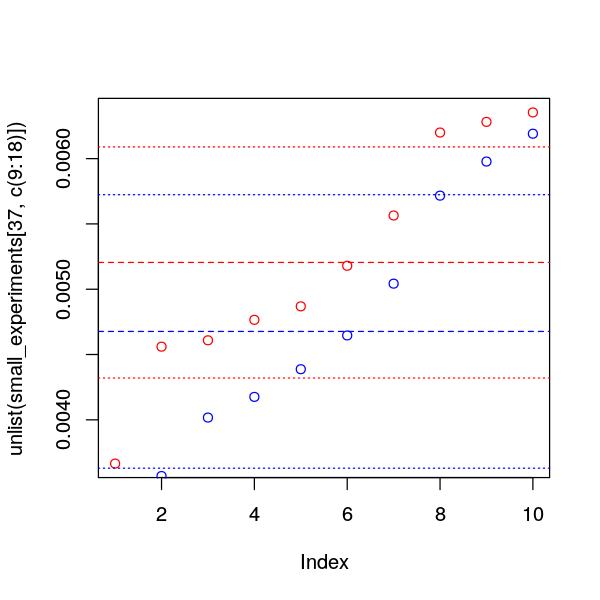

In [40]:
plot(unlist(small_experiments[37,c(9:18)]),col="red")
abline(h=small_experiments[37,]$epsilon_mean,lty=2,col="red")
abline(h=small_experiments[37,]$epsilon_mean-sqrt(small_experiments[37,]$epsilon_var),lty=3,col="red")
abline(h=small_experiments[37,]$epsilon_mean+sqrt(small_experiments[37,]$epsilon_var),lty=3,col="red")

points(unlist(small_experiments[55,c(9:18)]),col="blue")
abline(h=small_experiments[55,]$epsilon_mean,lty=2,col="blue")
abline(h=small_experiments[55,]$epsilon_mean-sqrt(small_experiments[55,]$epsilon_var),lty=3,col="blue")
abline(h=small_experiments[55,]$epsilon_mean+sqrt(small_experiments[55,]$epsilon_var),lty=3,col="blue")

pdf 
  2

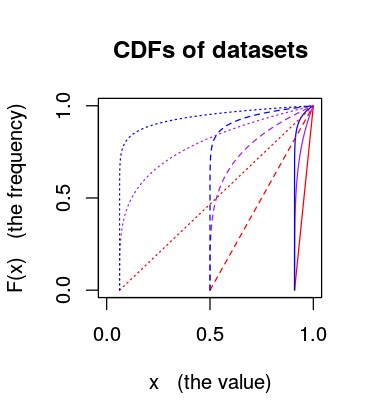

pdf 
  2

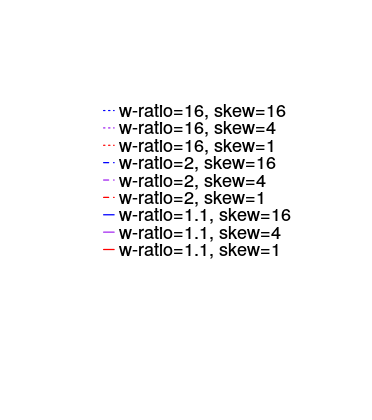

In [387]:

plot_width = 3.1;
plot_height = 3.5;
options(repr.plot.width=plot_width, repr.plot.height=plot_height);

xs=1:1000/1000;
 #w[i] is in [1,max_weight_ratio]
plot(1, type="n",xaxt='n',yaxt='n', xlim=c(0,1),ylim=c(0,1), xlab="x   (the value)", ylab="F(x)   (the frequency)",main="CDFs of datasets")
axis(side = 1, at=c(0,0.5,1.0))
axis(side = 2, at=c(0,0.5,1.0))

skews=c(1,4,16);
ratios=c(1.1,2,16);
cols=c("red","purple","blue");
flatcols=c(1:9);
flatdescr=c(1:9);
flatltys=c(1:9);

                             

for(ratioi in 1:3) {
for(skewi in 1:3) {
    skew = skews[skewi];
    ratio = ratios[ratioi];
    j = 10-((ratioi-1)*3+skewi);
    col = cols[skewi];
    
    flatcols[j]=col;
    flatdescr[j]=paste("w-ratio=",ratio,", skew=",skew,sep="");
    flatltys[j]=ratioi;
    
    points(((xs)^skew*(ratio-1)+1)/ratio,xs,type="l",col=col,lty=ratioi)
}}
dev.print(pdf, "CDFs.pdf",width=plot_width,height=plot_height);

plot.new()
legend("topleft",bty="n",legend = flatdescr,col = flatcols, lty = flatltys, y.intersp=2.5,cex=0.9)
dev.print(pdf, "CDFs_legend.pdf",width=plot_width,height=plot_height);


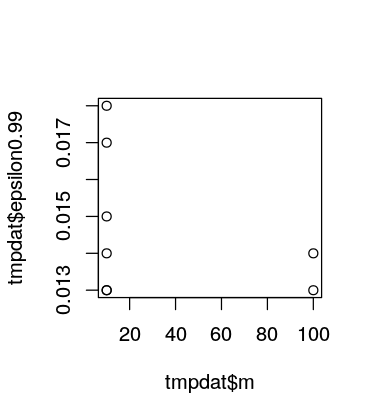

In [360]:
tmpdat=all_experiments[all_experiments$skew == 16 & all_experiments$k_factor == 16 & abs(all_experiments$max_weight_ratio-4)<1e-3, ];


In [350]:
df = all_experiments[,c("skew","k_factor","max_weight_ratio")]
common_value_sets=sort(table(unlist(lapply(as.list(as.data.frame(t(df))),toString))),decreasing=TRUE);
all_experiments[all_experiments$skew == 1 & all_experiments$k_factor == 16 & abs(all_experiments$max_weight_ratio-4)<1e-3, ]$m
all_experiments[all_experiments$skew == 1 & all_experiments$k_factor == 4 & abs(all_experiments$max_weight_ratio-16)<1e-3, ]$m
all_experiments[all_experiments$skew == 16 & all_experiments$k_factor == 16 & abs(all_experiments$max_weight_ratio-4)<1e-3, ]$m

[1] 100 100  10  10

[1] 100 100  10  10

[1] 100 100  10  10

In [5]:

common_value_sets

ERROR: Error in eval(expr, envir, enclos): object 'common_value_sets' not found
